In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("goalscorers.csv", encoding='latin1')
df1 = pd.read_csv("results.csv")

In [3]:
df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,5/5/1993,Malaysia,Macau,Malaysia,A. Elangovan,42.0,False,False
1,4/30/1997,Malta,Faroe Islands,Faroe Islands,Ossur Hansen,60.0,False,False
2,9/3/2000,Faroe Islands,Slovenia,Faroe Islands,Ossur Hansen,90.0,False,False
3,6/2/1993,Norway,England,Norway,Oyvind Leonhardsen,43.0,False,False
4,11/16/1994,Belarus,Norway,Norway,Oyvind Leonhardsen,39.0,False,False


In [4]:
df.tail()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
44329,11/18/2007,Syria,Indonesia,Syria,Zyad Chaabo,87.0,False,False
44330,3/26/2008,Syria,United Arab Emirates,Syria,Zyad Chaabo,2.0,False,False
44331,5/21/1967,Poland,Belgium,Poland,Zygfryd SzoÅtysik,72.0,False,False
44332,10/14/1970,Poland,Albania,Poland,Zygfryd SzoÅtysik,90.0,False,False
44333,6/9/2022,Kosovo,Northern Ireland,Kosovo,Zymer Bytyqi,19.0,False,False


In [5]:
df.shape

(44334, 8)

In [6]:
df.columns

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

In [7]:
df.dtypes

date          object
home_team     object
away_team     object
team          object
scorer        object
minute       float64
own_goal        bool
penalty         bool
dtype: object

In [8]:
df['home_team'].unique()

array(['Malaysia', 'Malta', 'Faroe Islands', 'Norway', 'Belarus',
       'Luxembourg', 'Switzerland', 'Latvia', 'Lithuania', 'Estonia',
       'Colombia', 'Netherlands', 'United States', 'Paraguay',
       'Venezuela', 'Uruguay', 'Costa Rica', 'Peru', 'Chile', 'Ecuador',
       'Argentina', 'Bolivia', 'Sweden', 'Czechoslovakia', 'Scotland',
       'Honduras', 'Mexico', 'Andorra', 'Nicaragua', 'El Salvador',
       'Canada', 'Tunisia', 'Moldova', 'Kazakhstan', 'Senegal',
       'South Korea', 'Turkey', 'Germany', 'Gibraltar', 'Armenia',
       'England', 'Bulgaria', 'Azerbaijan', 'Italy', 'Brazil',
       'Guatemala', 'France', 'Belgium', 'Northern Ireland', 'Portugal',
       'Gabon', 'DR Congo', 'Indonesia', 'Hungary', 'Finland', 'Austria',
       'San Marino', 'Taiwan', 'Vietnam', 'Denmark', 'Spain', 'Croatia',
       'Liechtenstein', 'Japan', 'Georgia', 'Bosnia and Herzegovina',
       'South Africa', 'Cuba', 'Panama', 'Trinidad and Tobago',
       'Guadeloupe', 'Guyana', 'Haiti', '

In [9]:
df.nunique()

date          4627
home_team      220
away_team      220
team           220
scorer       14330
minute         121
own_goal         2
penalty          2
dtype: int64

In [10]:
df.describe()

,minute
count,44075.000000
mean,50.011843
std,26.354364
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [11]:
df['home_team'].value_counts()

home_team
Brazil              1023
Argentina            989
Germany              798
Mexico               707
France               667
                    ... 
Yemen DPR              5
Somalia                5
South Sudan            4
Saarland               4
Vietnam Republic       4
Name: count, Length: 220, dtype: int64

In [12]:
df.isnull()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
44329,False,False,False,False,False,False,False,False
44330,False,False,False,False,False,False,False,False
44331,False,False,False,False,False,False,False,False
44332,False,False,False,False,False,False,False,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44334 entries, 0 to 44333
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44334 non-null  object 
 1   home_team  44334 non-null  object 
 2   away_team  44334 non-null  object 
 3   team       44334 non-null  object 
 4   scorer     44285 non-null  object 
 5   minute     44075 non-null  float64
 6   own_goal   44334 non-null  bool   
 7   penalty    44334 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


## Which teams have played the most matches in the dataset ?

In [14]:
df['team'].value_counts(ascending=False).reset_index()

,team,count
0,Brazil,1051
1,Germany,974
2,Argentina,945
3,Spain,890
4,Mexico,852
...,...,...
215,Yemen DPR,4
216,Somalia,3
217,South Sudan,2
218,Anguilla,2


## Most Matches Played By Top 5 Teams

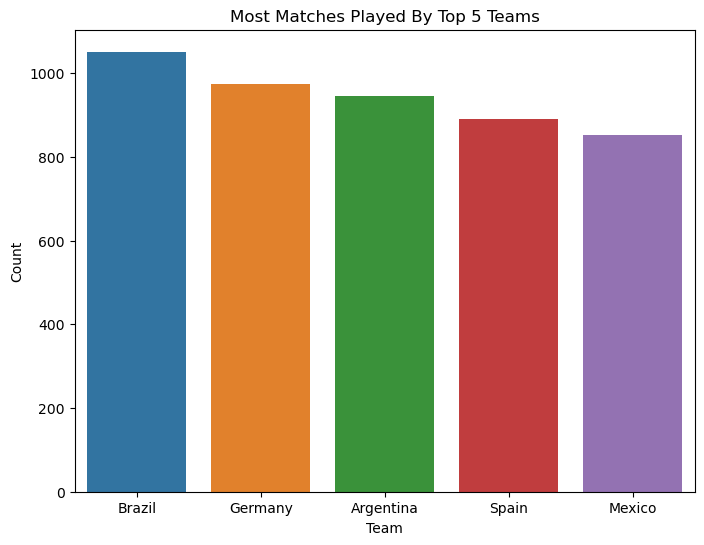

In [15]:
top_teams = df['team'].value_counts().nlargest(5).index

#Filtering the dataframe to include only top 5 Teams
filtered_df = df[df['team'].isin(top_teams)]

#plot the count of matches played by top 5 teams
plt.figure(figsize=(8,6))
sns.countplot(data=filtered_df, x='team',order=top_teams)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Most Matches Played By Top 5 Teams')
plt.show()

## What is the distribution of matches played over the years ?

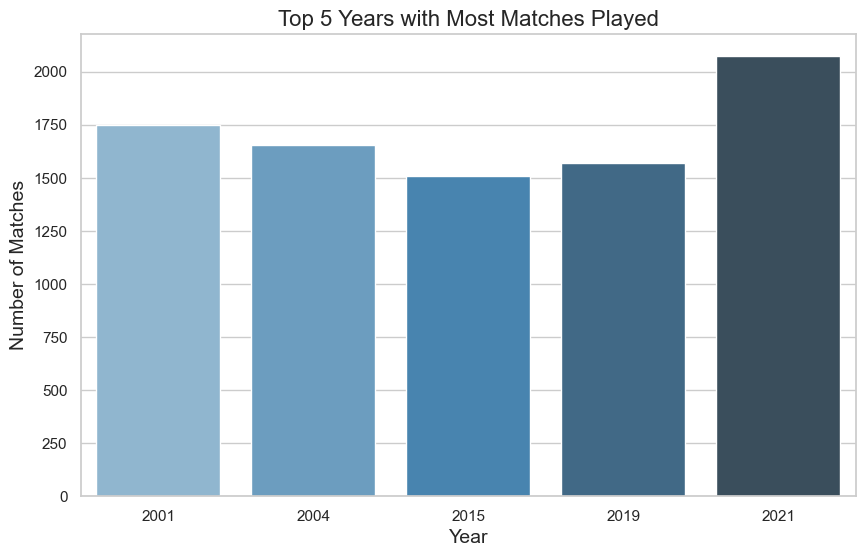

In [16]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by Year an Find number of matches
matches_per_year = df.groupby('year').size().reset_index(name='number_of_matches')

#Sort by the number of matches in descending order and get the top 5 years
top_5_year = matches_per_year.sort_values(by='number_of_matches',ascending=False).head()
top_5_year
#Plot bar chart for top 5 years
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='number_of_matches', data=top_5_year, palette='Blues_d')

# Adding title and labels
plt.title('Top 5 Years with Most Matches Played', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.show()

## How many matches resulted in own Goal ?

In [17]:
df['own_goal'].value_counts()

own_goal
False    43514
True       820
Name: count, dtype: int64

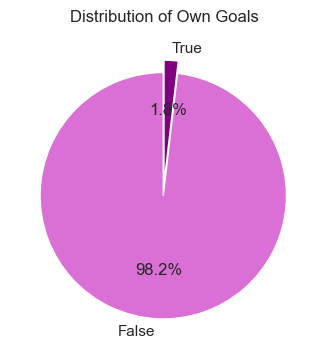

In [18]:
# Count the occurrences of each value in the 'own_goal' column
goals = df['own_goal'].value_counts()

# Define colors for the pie chart
colors = ['orchid', 'purple']

# Plotting the pie chart
plt.figure(figsize=(8, 4))
plt.pie(goals, labels=goals.index, colors=colors, explode=[0.1, 0], autopct='%1.1f%%', startangle=90)

# Adding a title
plt.title('Distribution of Own Goals')

# Show the plot
plt.show()

## Top Goal Scorer by Players

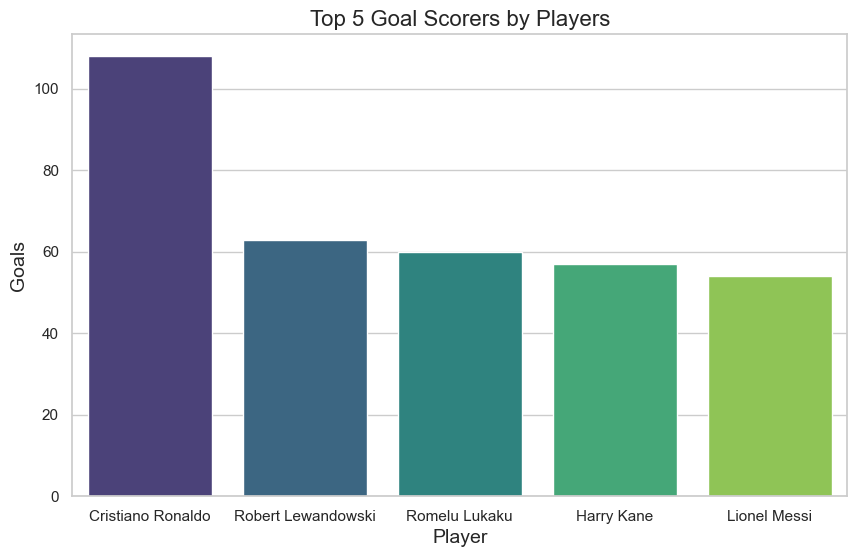

In [19]:
# Get the top 5 goal scorers
top_scorer = df['scorer'].value_counts()
top_goal_scorers = top_scorer.nlargest(5).index

# Filter the original DataFrame to include only the top 5 goal scorers
df_top_scorers = df[df['scorer'].isin(top_goal_scorers)]

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_scorers, x='scorer', order=top_goal_scorers, palette='viridis')

# Adding labels and title
plt.xlabel('Player', fontsize=14)
plt.ylabel('Goals', fontsize=14)
plt.title('Top 5 Goal Scorers by Players', fontsize=16)
plt.show()



## What is the frequency of penalty goals in matches ?


In [20]:
df['penalty'].value_counts().reset_index()

,penalty,count
0,False,41375
1,True,2959


<function matplotlib.pyplot.show(close=None, block=None)>

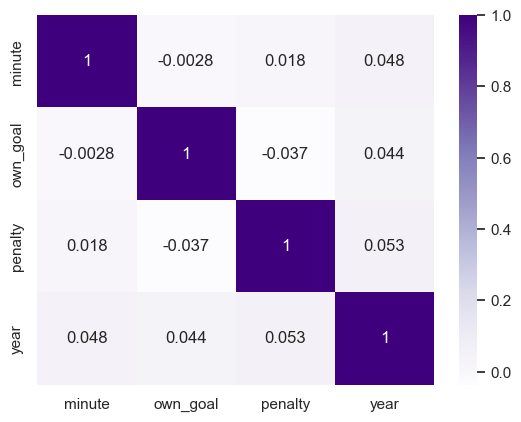

In [21]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Purples')
plt.show

In [22]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47376,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True
47377,2024-07-10,NaN,NaN,NaN,NaN,Copa América,Charlotte,United States,True
47378,2024-07-13,NaN,NaN,NaN,NaN,Copa América,Charlotte,United States,True
47379,2024-07-14,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True


## Summary of Dataset


In [23]:
num_matches = len(df1)
print(f"Number of Matches:{num_matches}")

Number of Matches:47381


## What is distribution of home and away score ?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


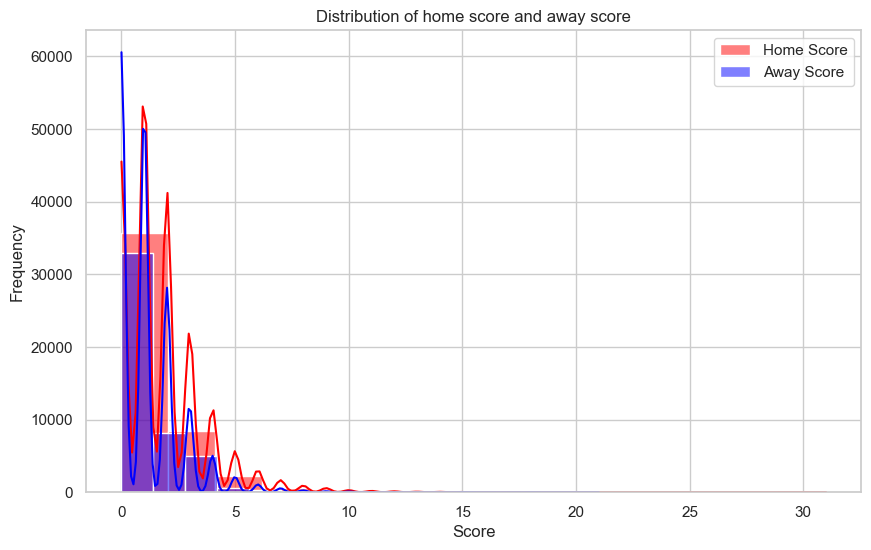

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='home_score', bins=15, kde=True, color='red', label='Home Score')
sns.histplot(data=df1, x='away_score', bins=15, kde=True, color='blue', label='Away Score')
plt.title('Distribution of home score and away score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Which Tournament have the most matches recorded ?

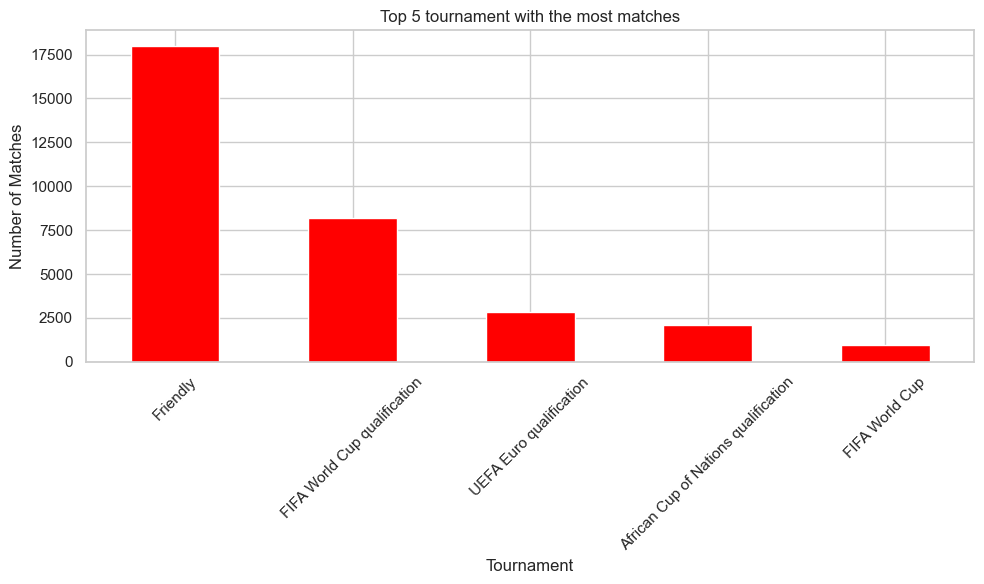

In [30]:
top_tournament = df1['tournament'].value_counts().nlargest(5)
plt.figure(figsize=(10,6))
top_tournament.plot(kind='bar',color='red')
plt.title('Top 5 tournament with the most matches')
plt.xlabel('Tournament')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Which cities/countries have hosted the most matches ?

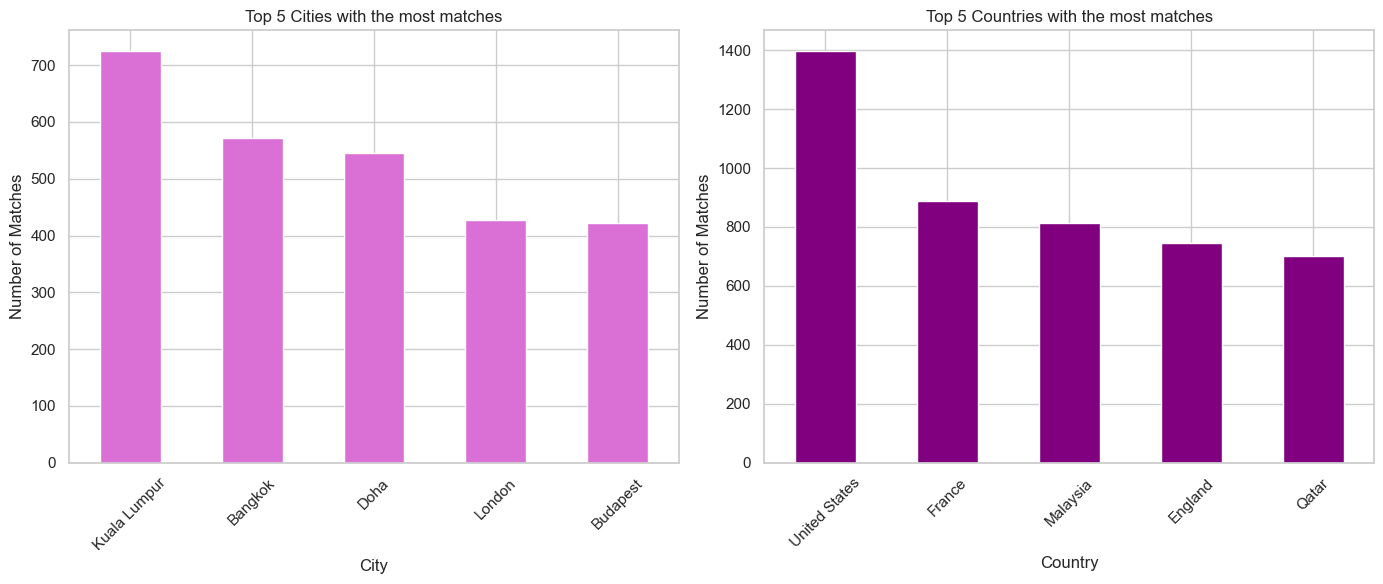

In [37]:
top_cities = df1['city'].value_counts().nlargest(5)
top_countries = df1['country'].value_counts().nlargest(5)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
top_cities.plot(kind='bar',color='orchid')
plt.title('Top 5 Cities with the most matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
top_countries.plot(kind='bar',color='purple')
plt.title('Top 5 Countries with the most matches')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [34]:
df1


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47376,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True
47377,2024-07-10,NaN,NaN,NaN,NaN,Copa América,Charlotte,United States,True
47378,2024-07-13,NaN,NaN,NaN,NaN,Copa América,Charlotte,United States,True
47379,2024-07-14,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True
